# Quantum Computing Challenge

**Wednesday, May 28, 2025**

**Starting time:** *9:30*

**End time:** *12:30*

---

## Environment settings

In [143]:
!pip install qiskit==1.4.1
!pip install qiskit-machine-learning==0.8.2
!pip install qiskit_ibm_runtime
!pip install qiskit_optimization
!pip install qiskit_algorithms
!pip install numpy pandas matplotlib pylatexenc seaborn scikit-learn networkx graphviz
!pip install qiskit_aer

In [144]:
# ON MAC
!brew install graphviz

==> Downloading https://formulae.brew.sh/api/formula.jws.json
==> Downloading https://formulae.brew.sh/api/cask.jws.json
To reinstall 12.2.1, run:
  brew reinstall graphviz


In [145]:
# ON LINUX
#!sudo apt install graphviz
# or
#!sudo dnf install graphviz
# https://graphviz.org/download/

In [146]:
# Basic python packages 

import matplotlib.pyplot as plt
import numpy as np
import math, cmath
import time
import pandas as pd
import seaborn as sns
from IPython.display import clear_output
import networkx as nx

In [147]:
# Qiskit basic packages

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeBrisbane, FakeKyiv, FakeSherbrooke
from qiskit_ibm_runtime import Sampler
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_gate_map
from qiskit.compiler import transpile
from qiskit_ibm_runtime import QiskitRuntimeService

In [148]:
# Machine Learning Packages

from sklearn.datasets import load_iris
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from qiskit_machine_learning.optimizers import COBYLA, ADAM
from qiskit_machine_learning.algorithms.classifiers import VQC

In [149]:
# Optimization Packages

from qiskit_optimization.applications import Tsp
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_algorithms.minimum_eigensolvers import SamplingVQE
from qiskit_algorithms.optimizers import NFT
from qiskit.circuit.library import TwoLocal
from qiskit_aer.primitives import Sampler as AerSampler

---

## Section 1: Bits, Qubits and Circuits

The following exercises are intended to familiarise you with the basic Qiskit commands relating to creating a new circuit and adding new gates.

<a id="badge1_ex1"></a>

<div class="alert alert-block alert-info">
    
<b> Question: The goal is to reach the recreate the circuit shown in figure. </b> 

Complete the following code block to achieve the expected result.
    
</div>

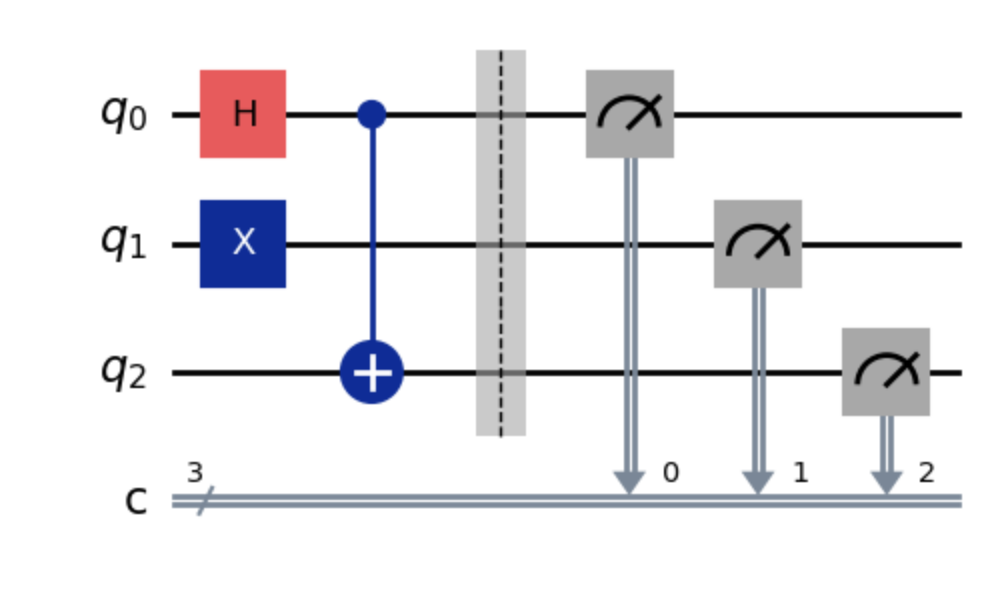

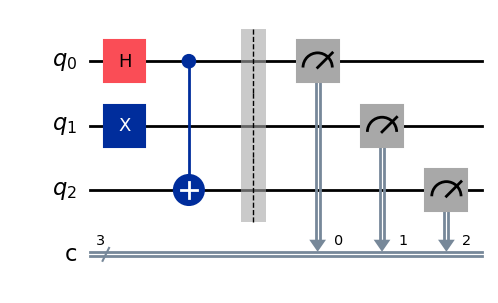

In [150]:
bell = QuantumCircuit(3,3)

# Gates
# >>> --- START EDITING --- <<<
bell.h(0)
bell.x(1)
bell.cx(0,2)
# >>> --- STOP EDITING --- <<<

bell.barrier()

# Measurements
# >>> --- START EDITING --- <<<
bell.measure(0,0)
bell.measure(1,1)
bell.measure(2,2)
# >>> --- STOP EDITING --- <<<

bell.draw(output='mpl')

<a id="badge1_ex1"></a>

<div class="alert alert-block alert-info">
    
<b> Question: The goal is to reach the state $|1⟩$, as shown in the attached picture. Which gate do you apply? </b> 

Complete the following code block to achieve the expected result. There are multiple correct answers.
    
</div>

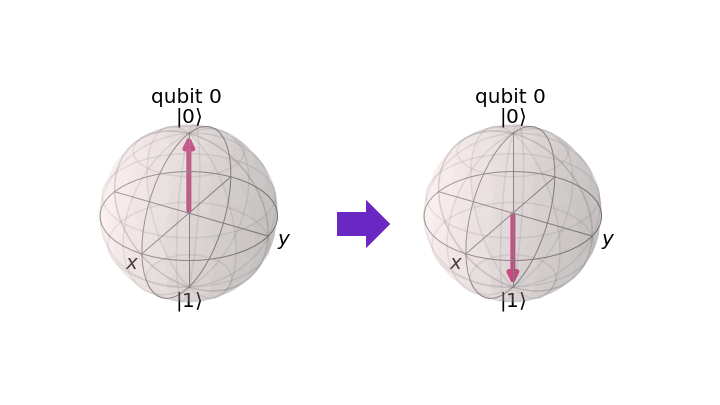

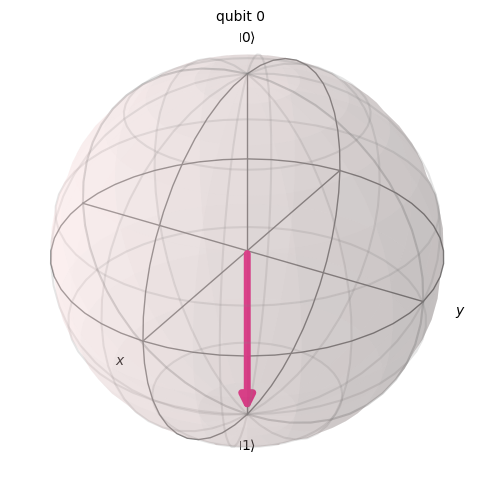

In [151]:
qc_q1 = QuantumCircuit(1,1)

# >>> --- START EDITING --- <<<
qc_q1.x(0)
# >>> --- STOP EDITING --- <<<

# Visualize your final state
state = Statevector.from_instruction(qc_q1)
plot_bloch_multivector(state)

<a id="badge1_ex3"></a>

<div class="alert alert-block alert-info">
    
<b> Question: We would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle  + |1\rangle )$, as shown in the attached picture.   Which gate do you apply?  </b> 
    
Complete the following code block to achieve the expected result. There are multiple correct answers.
    
</div>

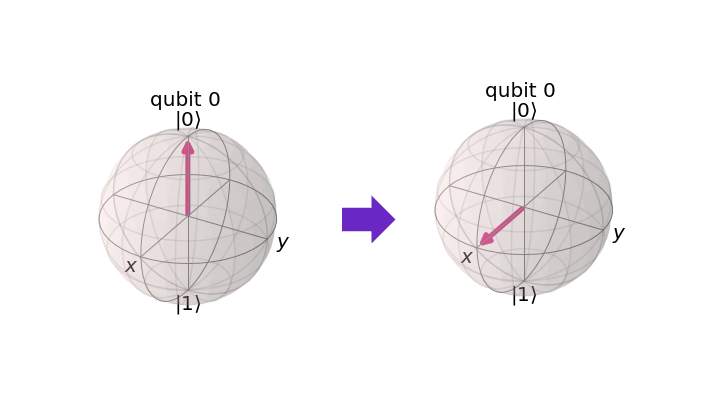

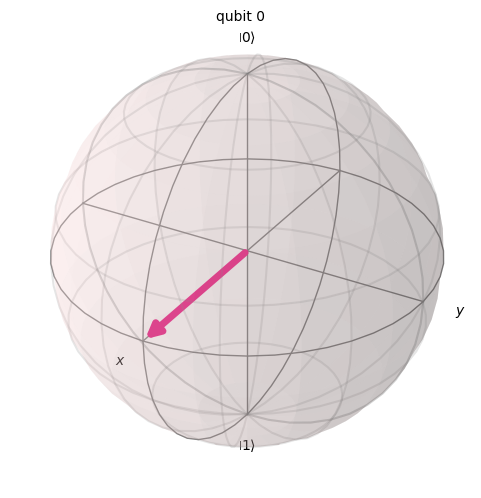

In [152]:
qc_q2 = QuantumCircuit(1,1)

# >>> --- START EDITING --- <<<
qc_q2.h(0)
# >>> --- STOP EDITING --- <<<

# Visualize your final state
state = Statevector.from_instruction(qc_q2)
plot_bloch_multivector(state)

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$, as shown in the attached picture.  Which gate sequence do you apply? </b> 
    
Complete the following code block to achieve the expected result. There are multiple correct answers.

</div>

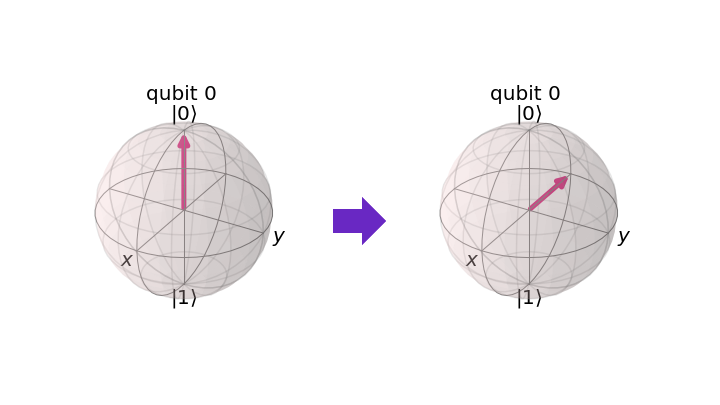

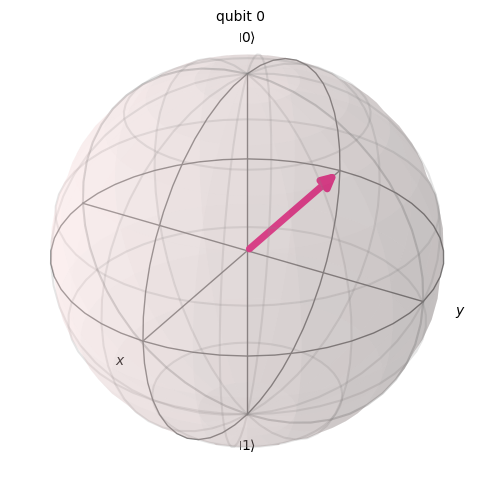

In [153]:
qc_q3 = QuantumCircuit(1,1)

# >>> --- START EDITING --- <<<
qc_q3.h(0)
qc_q3.z(0)
# identity HZ = XH
# >>> --- STOP EDITING --- <<<

# Visualize your final state
state = Statevector.from_instruction(qc_q3)
plot_bloch_multivector(state)

---

# Section 2: Simulating Circuits

In the following cells, we show how to run a circuit on the local Aer simulator. Aer is a perfect simulator, i.e. unlike real quantum computers it is noise-free.  

Let's reuse the circuit called "bell" from the first exercise and run it 500 times on Aer using the "Sampler" primitive from the Qiskit Runtime.

In [154]:
aer_sim = AerSimulator()
sampler = Sampler(mode=aer_sim)
bell_transpiled = transpile(bell, backend=aer_sim)

shots=500

aer_result = sampler.run([bell], shots=shots).result()

aer_dist = aer_result[0].data.c.get_counts()
print("Results: ", aer_dist)

Results:  {'111': 248, '010': 252}


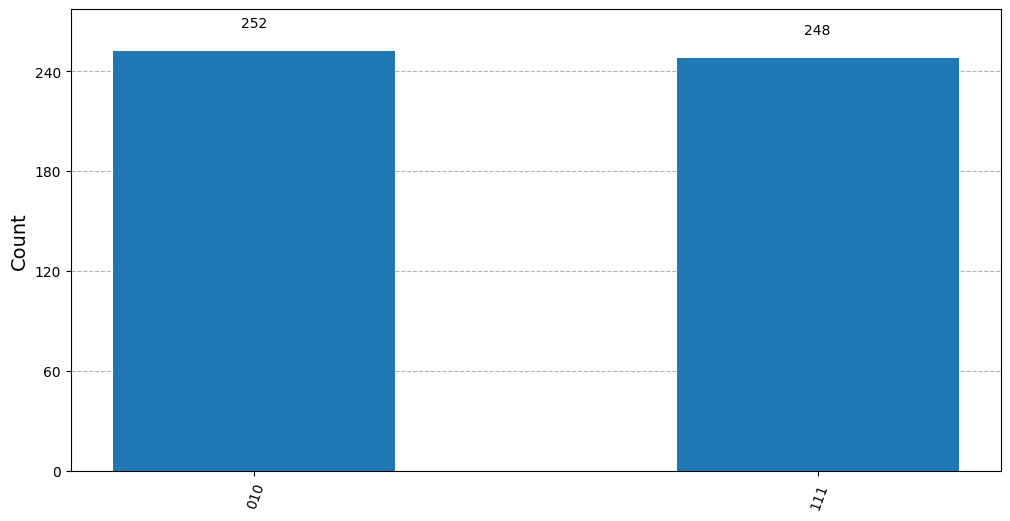

In [155]:
plot_histogram(aer_dist)

<a id="badge1_ex3"></a>

<div class="alert alert-block alert-info">
    
<b> Question: trying out non-perfect simulators that include noise in our results.</b> 
    
We have already imported three "fake backends" (non-perfect simulators) from the Qiskit Runtime: FakeBrisbane, FakeKyiv, FakeSherbrooke. Using the same code sintax used for the Aer simulator, complete the following code block to adding the results from these new 3 simulators to the histogram.
    
</div>

In [156]:
# >>> --- START EDITING --- <<<

fake_brisbane_sim = FakeBrisbane()
sampler = Sampler(mode=fake_brisbane_sim)
bell_transpiled = transpile(bell, backend=fake_brisbane_sim)
shots=500
fake_brisbane_result = sampler.run([bell_transpiled], shots=shots).result()
fake_brisbane_dist = fake_brisbane_result[0].data.c.get_counts()


fake_kyiv_sim = FakeKyiv()
sampler = Sampler(mode=fake_kyiv_sim)
bell_transpiled = transpile(bell, backend=fake_kyiv_sim)
shots=500
fake_kyiv_result = sampler.run([bell_transpiled], shots=shots).result()
fake_kyiv_dist = fake_kyiv_result[0].data.c.get_counts()


fake_sherbrooke_sim = FakeSherbrooke()
sampler = Sampler(mode=fake_sherbrooke_sim)
bell_transpiled = transpile(bell, backend=fake_sherbrooke_sim)
shots=500
fake_sherbrooke_result = sampler.run([bell_transpiled], shots=shots).result()
fake_sherbrooke_dist = fake_sherbrooke_result[0].data.c.get_counts()

# >>> --- STOP EDITING --- <<<

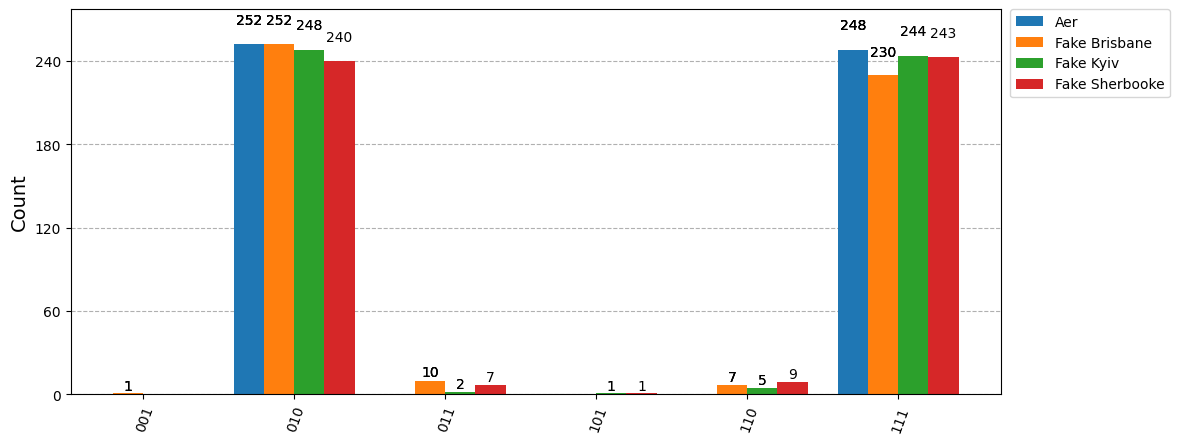

In [157]:
plot_histogram([aer_dist, fake_brisbane_dist, fake_kyiv_dist, fake_sherbrooke_dist], 
               legend=['Aer','Fake Brisbane', 'Fake Kyiv', 'Fake Sherbooke'], 
               figsize=(12,5))

---

# Section 3: Running circuits on real hardware

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Goal is to get your Qiskit Runtime API key. </b> 
    
Suggestions: go to https://quantum.cloud.ibm.com/, create a new open (free) instance and a new API key. If you have no IBM Cloud account, get one for free.

</div>

In [ ]:
api_key=''

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Initiate a QiskitRuntimeService </b> 
    
</div>

In [165]:
'''
QiskitRuntimeService.save_account(
  token =     # COMPLETE HERE
  channel="ibm_cloud", # `channel` distinguishes between different account types.
  instance =  # COMPLETE HERE
  name =      # COMPLETE HERE
  overwrite = True # Only needed if you already have Cloud credentials.
)

# Load saved credentials if you specified a name
service = # COMPLETE HERE
'''

QiskitRuntimeService.save_account(
  token = api_key,
  channel="ibm_cloud", # `channel` distinguishes between different account types.
  instance="Challenge", # Copy the instance CRN from the Instance section on the dashboard.
  name="LUCA CAVALLINI", # Optionally name this set of credentials.
  overwrite=True # Only needed if you already have Cloud credentials.
)

# Load saved credentials if you specified a name
service = QiskitRuntimeService(name="LUCA CAVALLINI")

In [ ]:
service = QiskitRuntimeService(channel="ibm_quantum", token=api_key)

With the following cells, you can print out the backends available to your users, select the one with the shortest process queue and print out its physical qubit map.

In [166]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_torino')>]

In [167]:
quantum_backend = service.least_busy(operational=True, simulator=False)
quantum_backend.status()

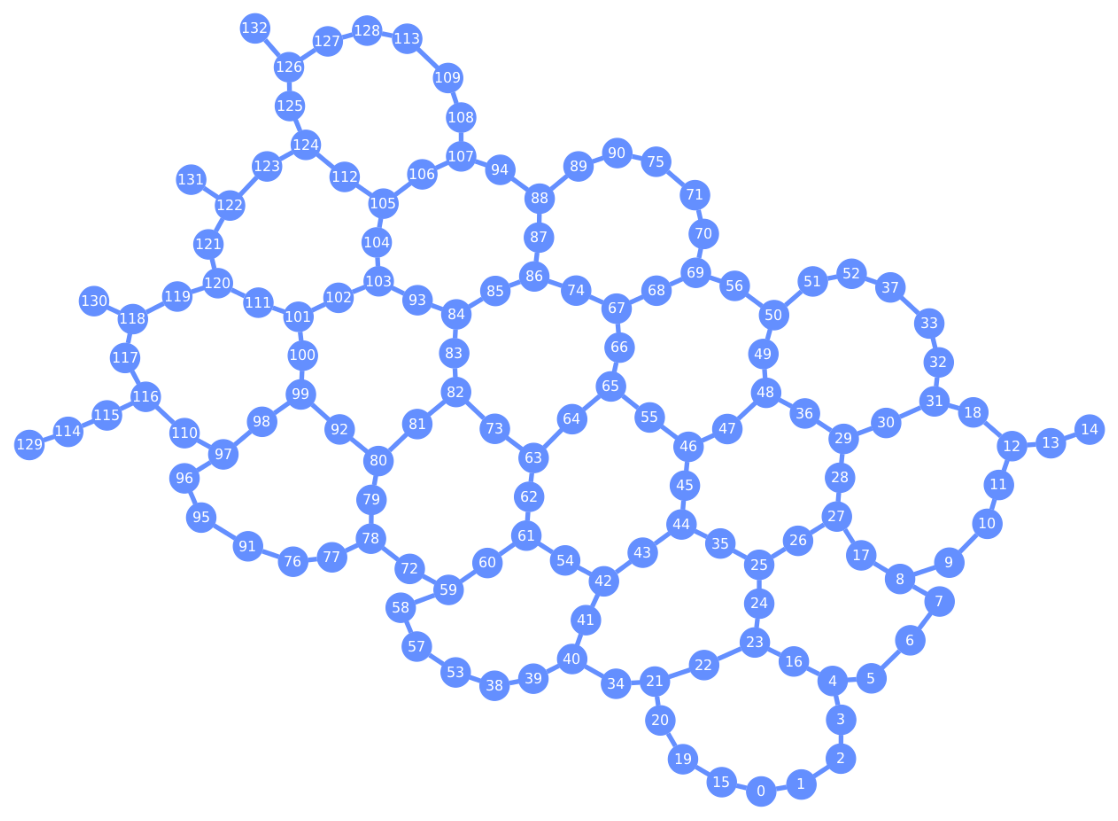

In [168]:
plot_gate_map(quantum_backend)

In the following cells, we aim to prepare a circuit for execution on real hardware. Remember the "bell" circuit from the first section? Let's retrieve it here.

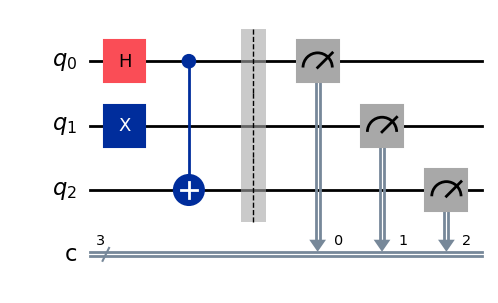

In [169]:
bell.draw(output='mpl')

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Transpile the circuit with optimization level 0</b> 

The objective is to transpile the circuit for the previously selected backend. Set optimisation level 0 and note how the original circuit is transformed to fit the physical processor on which we intend to run it.    
</div>

Depth: 14
Ops count:  OrderedDict([('sx', 9), ('rz', 6), ('cz', 4), ('measure', 3), ('x', 1), ('barrier', 1)])


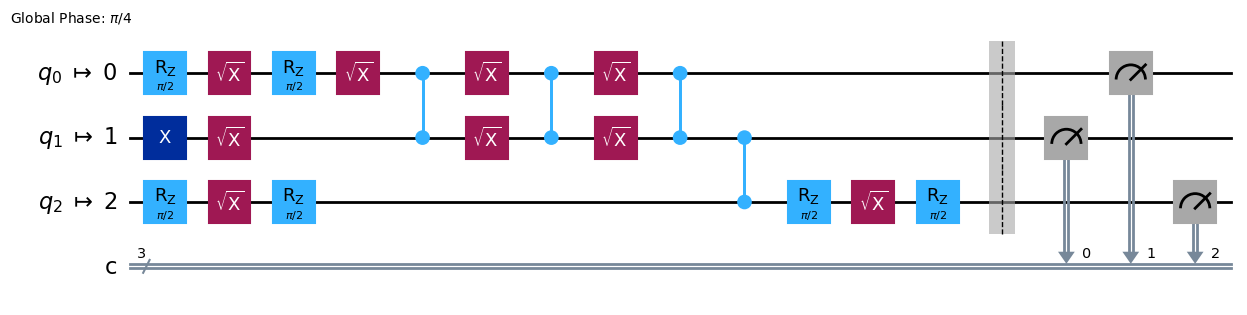

In [170]:
# >>> --- START EDITING --- <<<
bell_transpiled_0 = transpile(bell, quantum_backend, optimization_level=0)
# >>> --- STOP EDITING --- <<<


# Print the depth of the transpiled circuit
print('Depth:', bell_transpiled_0.depth())
# Print the number of operations of the transpiled circuit
print('Ops count: ', bell_transpiled_0.count_ops())
bell_transpiled_0.draw('mpl', idle_wires=False)


<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Transpile the circuit with optimization level 2</b> 

We try to reduce the depth and complexity of the circuit by using a higher optimisation level. Transpile the circuit and observe how it has transformed compared to the original circuit and compared to transpiled with level 0.
</div>

Depth: 7
Ops count:  OrderedDict([('rz', 5), ('sx', 3), ('measure', 3), ('x', 1), ('cz', 1), ('barrier', 1)])


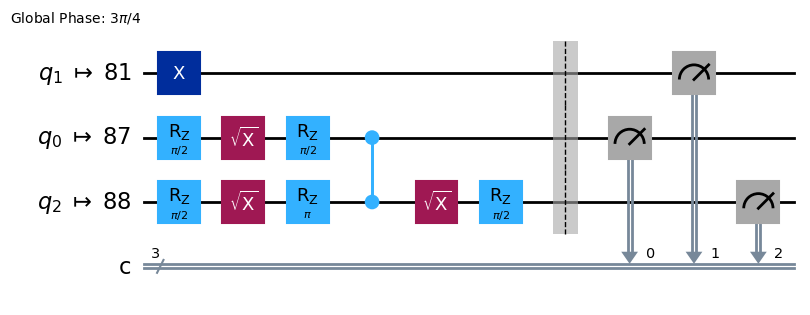

In [171]:
# >>> --- START EDITING --- <<<
bell_transpiled_2 = transpile(bell, quantum_backend, optimization_level=2 )
# >>> --- STOP EDITING --- <<<

# Print the depth of the transpiled circuit
print('Depth:', bell_transpiled_2.depth())
# Print the number of operations of the transpiled circuit
print('Ops count: ', bell_transpiled_2.count_ops())
bell_transpiled_2.draw('mpl', idle_wires=False)


In the following cell we will execute 500 shots of the Bell circuit on the Aer simulator. We have done this before but this time we will use a different syntax by creating a job. The execution of our job on the local Aer simulator will be instantaneous, but this same paradigm is used, as we will see shortly, for scheduling jobs on physical processors in the IBM Cloud.

In [65]:
sampler = Sampler(mode=aer_sim)
shots = 500
quantum_job_aer = sampler.run([bell_transpiled_2], shots=shots)
quantum_result_aer = quantum_job_aer.result()
quantum_dist_aer = quantum_result_aer[0].data.c.get_counts()
print(quantum_dist_aer)

{'010': 280, '111': 220}


<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Run a job on phisical hardware</b> 

In the following cell, using the syntax already tried and tested, schedule a job on the quantum backend. Set sampler.options.dynamical_decoupling.enable and sampler.options.twirling.enable_measure to False to suppress error mitigation.</div>

In [ ]:

sampler = Sampler(mode=quantum_backend)

sampler.options.dynamical_decoupling.enable = False # for the moment, let's suppress error mitigation
sampler.options.twirling.enable_measure = False # for the moment, let's suppress error mitigation

quantum_job = sampler.run([bell_transpiled_2], shots=shots)


# ⚠️⚠️⚠️ *_ATTENTION_* ⚠️⚠️⚠️

The execution of the job on the actual hardware is subject to a queue and may take a long time. With the following cell, you can check the status of the job. As long as the status is not 'DONE', do not continue with the following cells of this exercise and move directly to Section 4. Come back to this exercise later.

It is also possible to monitor the status of the job, with additional information, at https://quantum.cloud.ibm.com/.

In [68]:
quantum_job.status()

'DONE'

In [70]:
quantum_result = quantum_job.result()
quantum_dist = quantum_result[0].data.c.get_counts()
print("Results: ", quantum_dist)

Results:  {'011': 4, '111': 237, '010': 255, '101': 2, '000': 2}


In the following cell, you can compare the results of execution on a perfect local simulator and real quantum backend without error mitigation.

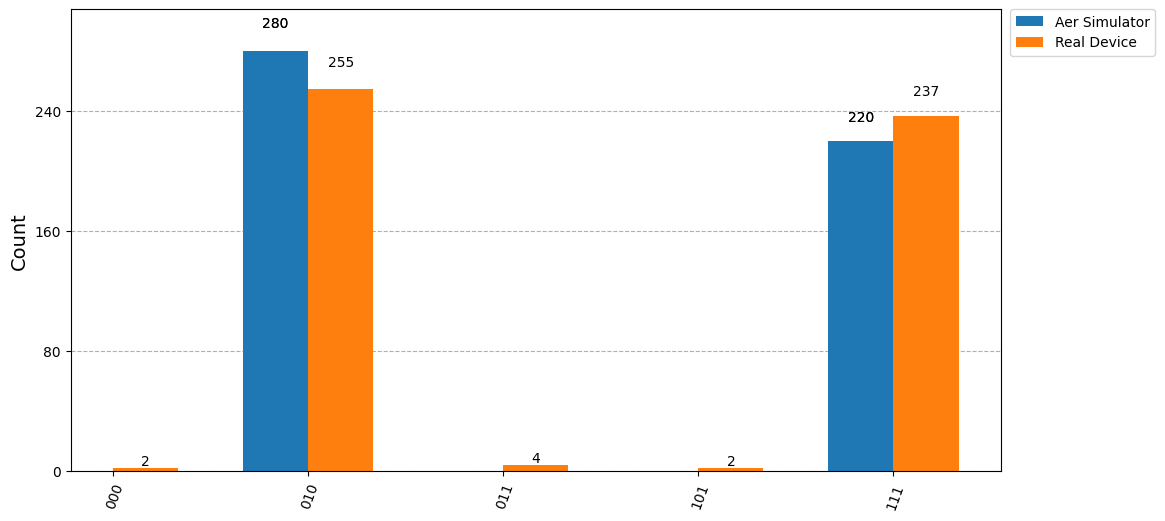

In [71]:
plot_histogram([quantum_dist_aer, quantum_dist], legend=['Aer Simulator', 'Real Device'])

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Run a job on phisical hardware with error mitigation</b> 

Open a new job, this time set sampler.options.dynamical_decoupling.enable and sampler.options.twirling.enable_measure to True for a certain level of error mitigation. Give a new name to the new results and plot them.

</div>

In [ ]:
# >>> --- START EDITING --- <<<
sampler = Sampler(mode=quantum_backend)

sampler.options.dynamical_decoupling.enable = True
sampler.options.twirling.enable_measure = True 

quantum_job_mitigated = sampler.run([bell_transpiled_2], shots=shots)
# >>> --- START EDITING --- <<<

# ⚠️⚠️⚠️ *_ATTENTION_* ⚠️⚠️⚠️

The execution of the job on the actual hardware is subject to a queue and may take a long time. With the following cell, you can check the status of the job. As long as the status is not 'DONE', do not continue with the following cells of this exercise and move directly to Section 4. Come back to this exercise later.

It is also possible to monitor the status of the job, with additional information, at https://quantum.cloud.ibm.com/.

In [ ]:
quantum_job_mitigated.status()

In [ ]:
quantum_result_mitigated = quantum_job_mitigated.result()
quantum_dist_mitigated = quantum_result_mitigated[0].data.c.get_counts()
print("Results: ", quantum_dist_mitigated)

In [ ]:
plot_histogram([quantum_dist_aer, quantum_dist, quantum_dist_mitigated], legend=['Aer Simulator', 'Real Device', 'Real Device - Err. Mitig.'])

---

# Section 4: Quantum Machine Learning

The aim of this section is to implement a VQC (Variational Quantum Classifier) algorithm for classifying the 'Iris' dataset, which is very popular in the literature and usually employed for four-class classification tasks.

In order to compare the results of the quantum algorithm with those of a classical algorithm, an SVC (Support Vector Machine) will be implemented in the following cells.

## Data preparation

In [172]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [173]:
features = iris_data.data
labels = iris_data.target

features = MinMaxScaler().fit_transform(features)

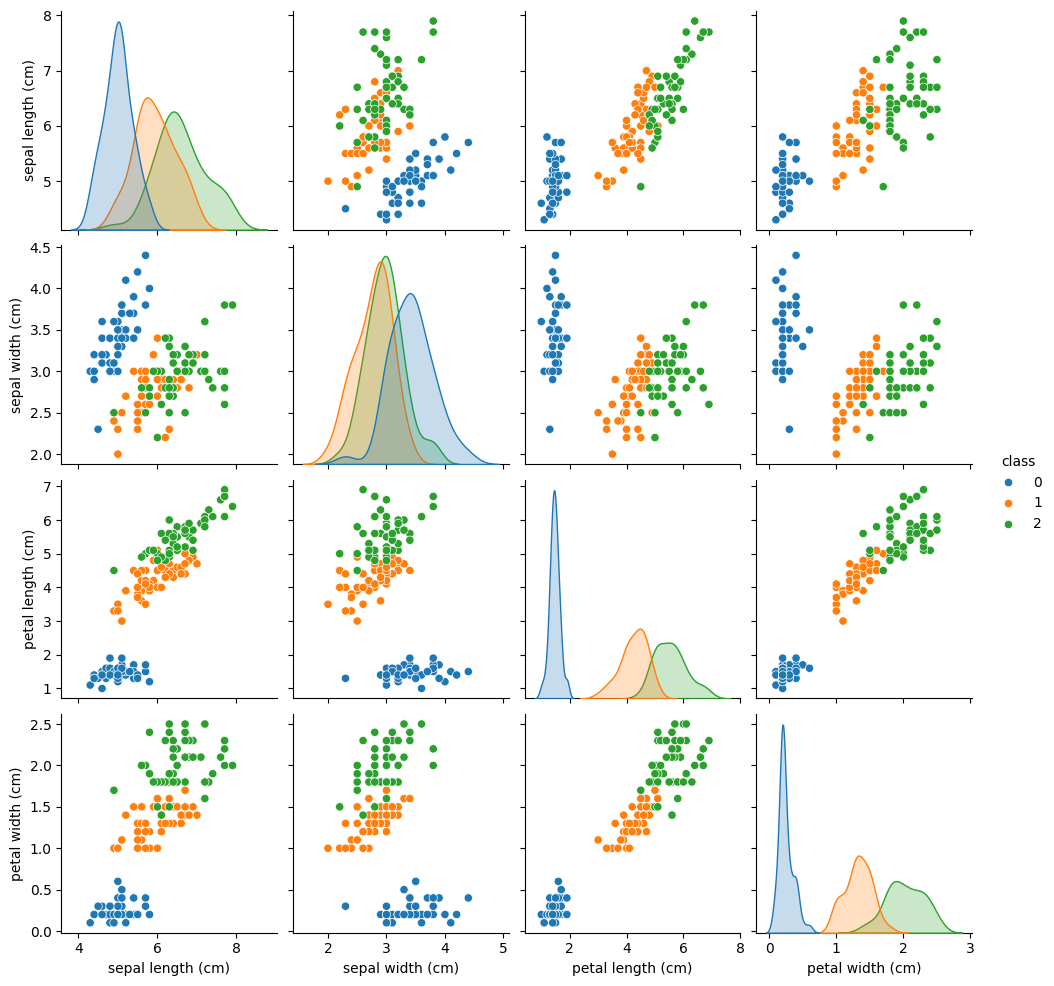

In [174]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

sns.pairplot(df, hue="class", palette="tab10")
plt.show()

In [175]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8)

## SVC training and testing

In [176]:
svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

In [178]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.97


### Quantum Algorithms

The first step in the implementation of a quantum machine learning algorithm is the mapping of classical data onto the quantum circuit. For this step, standard algorithms well known in the literature and already present in Qiskit are used. For this first exercise, we recommend using ZZFeatureMap.

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Goal is to implement a feature map using ZZFeatureMap(). </b> 
    
The inputs of the function are only the number of features and the number of repetitions of the feature map, a parameter you can experiment with (start with 1). If you find errors when executing, don't forget all the steps we have already seen in the circuit simulation section!

</div>

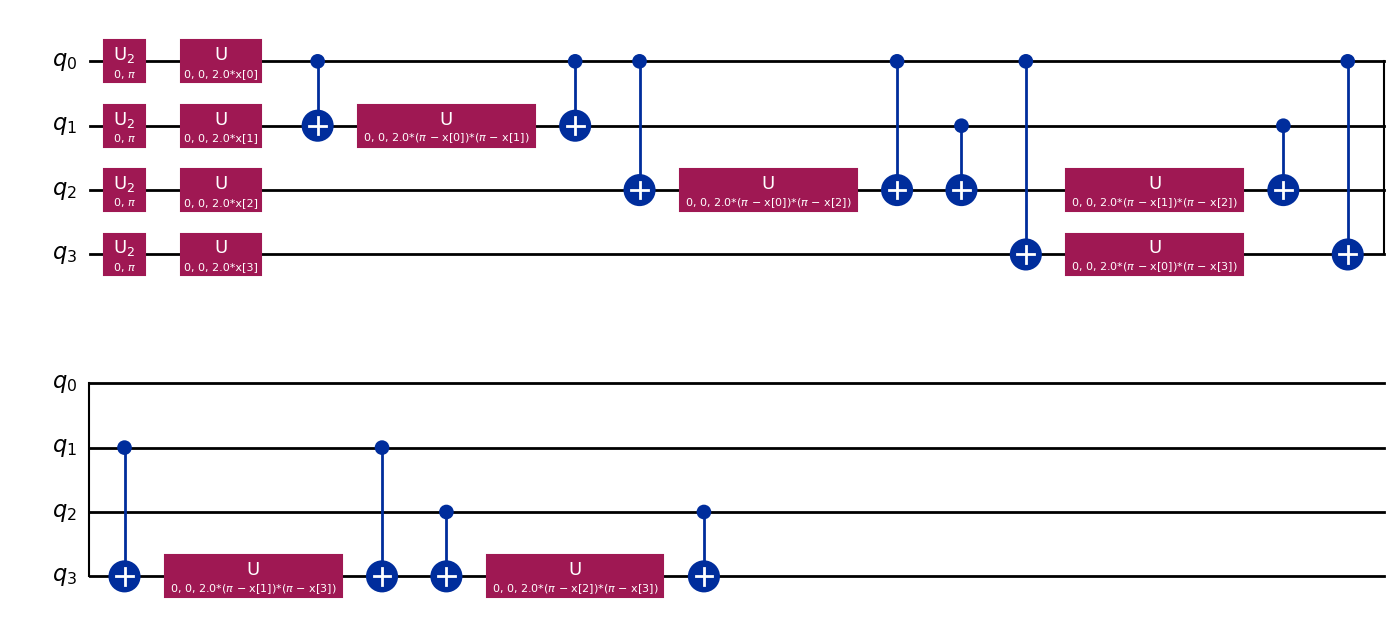

In [179]:
# >>> --- START EDITING --- <<<

num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map = transpile(feature_map, backend=aer_sim)

# >>> --- STOP EDITING --- <<<

# Visualize the feature map
feature_map.decompose().draw(output="mpl", fold=20)

The second step in implementing a circuit for quantum machine learning is to define the ansatz. This is a parametric circuit, i.e. a quantum circuit that includes variable parameters (typically rotation angles), analogous to the weights in classical machine learning models. Qiskit provides several ansatz structures already established in the literature; for this exercise, we recommend the use of the RealAmplitudes class.

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Goal is to implement an ansatz using RealAmplitudes(). </b> 
    
The inputs of the function are only the number of features and the number of repetitions of the ansatz, a parameter you can experiment with (start with 1). If you find errors when executing, don't forget all the steps we have already seen in the circuit simulation section!

</div>

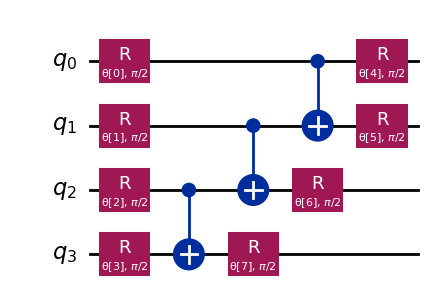

In [180]:
# >>> --- START EDITING --- <<<

ansatz = RealAmplitudes(num_qubits=num_features, reps=1)
ansatz.decompose().draw(output="mpl", fold=20)
ansatz = transpile(ansatz, backend=aer_sim)

# >>> --- STOP EDITING --- <<<

# Visualize the ansatz
ansatz.decompose().draw(output="mpl", fold=20)


In the following cells, we will define a gradient descent optimiser (COBYLA), a Sampler primitive, a callback function that will update the graph of the loss function at each iteration of the training, and a VQC algorithm that will receive as input all these ingredients, in addition to the feature map and ansatz already defined.

In [181]:
# Define the optimizer
optimizer = COBYLA(maxiter=100)

In [182]:
# Define the sampler
sampler = Sampler(mode=aer_sim)

In [183]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# Define the callback function
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

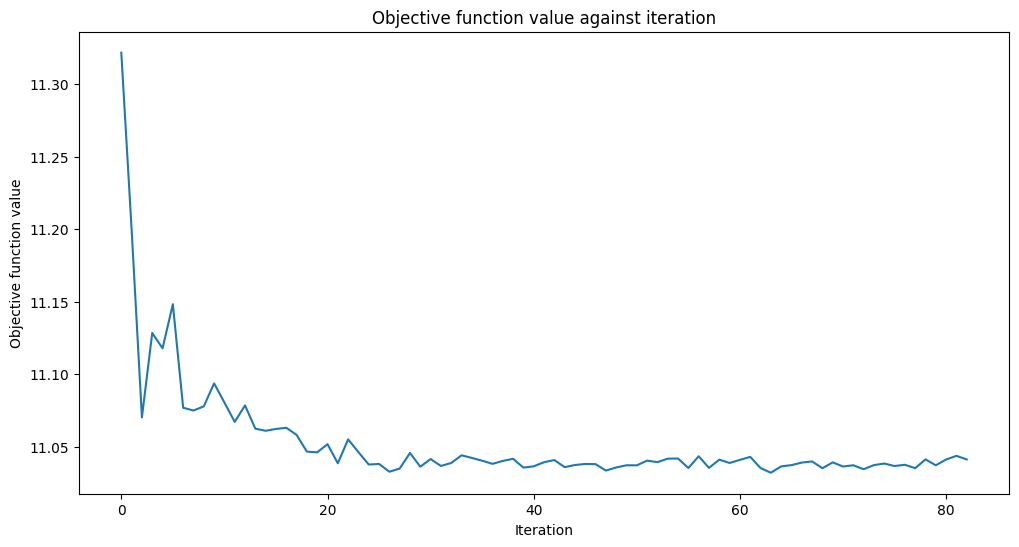

Training time: 32 seconds


In [184]:
# Define the VQC algorithm
vqc = VQC(
    sampler=sampler, # COMPLETE HERE
    feature_map=feature_map, # COMPLETE HERE
    ansatz=ansatz, # COMPLETE HERE
    optimizer=optimizer, # COMPLETE HERE
    callback=callback_graph, # COMPLETE HERE
)

# Clear objective value history
objective_func_vals = []

# Train the algoritm
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [185]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.55
Quantum VQC on the test dataset:     0.53


<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Goal is to implement a better algoritm. </b> 
    
With the suggested settings, you should achieve around 50% accuracy on both the training dataset and the test dataset. Unfortunately, this is not a good model at all! Hereafter, you are free to experiment with new techniques in order to obtain better results. Some suggestions for possible modifications:

- Change the number of reps of the feature map
- Change the number of reps of the ansatz
- Change ansatz, for example by experimenting with EfficientSU2
- Change optimiser.
- Change the max iter of the optimiser, by training more lugno
- Apply a PCA on the input data

With only a few changes to the code you should be able to get just over 60% accuracy on both the training dataset and the test dataset!

Optimizers:
https://qiskit-community.github.io/qiskit-machine-learning/apidocs/qiskit_machine_learning.optimizers.html

</div>

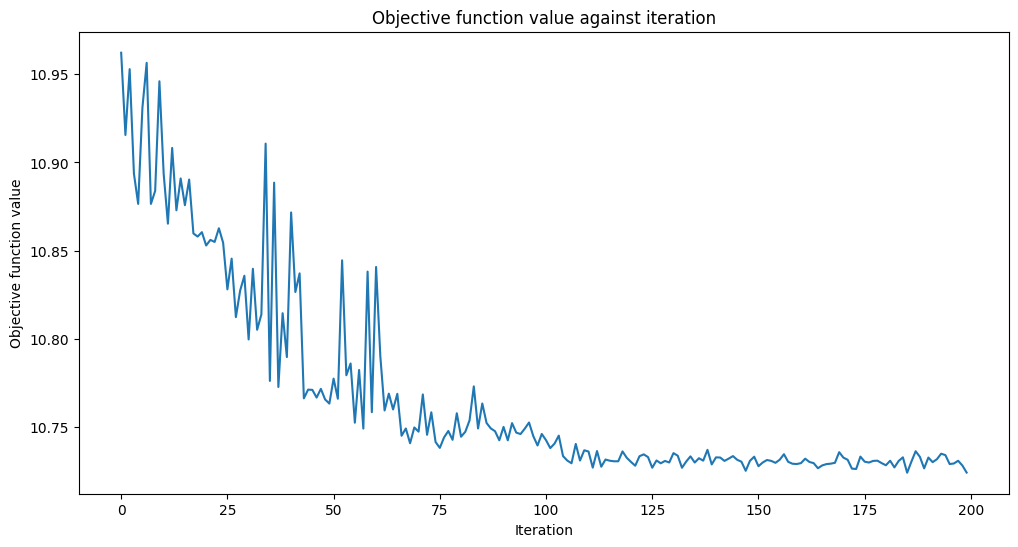

Training time: 80 seconds


In [29]:
# >>> --- START EDITING --- <<<

num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map = transpile(feature_map, backend=aer_sim)

ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)
ansatz = transpile(ansatz, backend=aer_sim)

optimizer = COBYLA(maxiter=200)

# Define the VQC algorithm
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# Clear objective value history
objective_func_vals = []

# Train the algoritm
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# >>> --- STOP EDITING --- <<<

In [30]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.60
Quantum VQC on the test dataset:     0.57


---

# Section 5: Optimization

## Introduction

Many problems in quantitative fields such as finance and engineering are optimization problems. Optimization problems lie at the core of complex decision-making and definition of strategies. 

Optimization (or combinatorial optimization) means searching for an optimal solution in a finite or countably infinite set of potential solutions. Optimality is defined with respect to some criterion function, which is to be minimized or maximized. This is typically called cost function or objective function. 

**Typical optimization problems**

Minimization: cost, distance, length of a traversal, weight, processing time, material, energy consumption, number of objects

Maximization: profit, value, output, return, yield, utility, efficiency, capacity, number of objects 

We consider here max-cut problems of practical interest in many fields, and show how they can be mapped on quantum computers manually and how Qiskit's optimization module supports this.

## Traveling Salesman Problem

In addition to being a notorious NP-complete problem that has drawn the attention of computer scientists and mathematicians for over two centuries, the Traveling Salesman Problem (TSP) has important bearings on finance and marketing, as its name suggests. Colloquially speaking, the traveling salesman is a person that goes from city to city to sell merchandise. The objective in this case is to find the shortest path that would enable the salesman to visit all the cities and return to its hometown, i.e. the city where he started traveling. By doing this, the salesman gets to maximize potential sales in the least amount of time. 

The problem derives its importance from its "hardness" and ubiquitous equivalence to other relevant combinatorial optimization problems that arise in practice.
 
The mathematical formulation with some early analysis was proposed by W.R. Hamilton in the early 19th century. Mathematically the problem is, as in the case of Max-Cut, best abstracted in terms of graphs. The TSP on the nodes of a graph asks for the shortest *Hamiltonian cycle* that can be taken through each of the nodes. A Hamilton cycle is a closed path that uses every vertex of a graph once. The general solution is unknown and an algorithm that finds it efficiently (e.g., in polynomial time) is not expected to exist.

A Hamiltonian cycle is described by $N^2$ variables $x_{i,p}$, where $i$ represents the node and $p$ represents its order in a prospective cycle. The decision variable takes the value 1 if the solution occurs at node $i$ at time order $p$. We require that every node can only appear once in the cycle, and for each time a node has to occur. This amounts to the two constraints (here and in the following, whenever not specified, the summands run over 0,1,...N-1)

Find the shortest Hamiltonian cycle in a graph $G=(V,E)$ with $n=|V|$ nodes and distances, $w_{ij}$ (distance from vertex $i$ to vertex $j$).  The distance that needs to be minimized is 

$$C(\textbf{x})=\sum_{i,j}w_{ij}\sum_{p} x_{i,p}x_{j,p+1}.$$

with the following constraints where any given node can be visited only once. 

$$\sum_{i} x_{i,p} = 1 ~~\forall p$$
$$\sum_{p} x_{i,p} = 1 ~~\forall i.$$

Combining this all together, we get a single objective function to be minimized:

$$C(\textbf{x})=\sum_{i,j}w_{ij}\sum_{p} x_{i,p}x_{j,p+1}+ A\sum_p\left(1- \sum_i x_{i,p}\right)^2+A\sum_i\left(1- \sum_p x_{i,p}\right)^2,$$

where $A$ is a free parameter. One needs to ensure that $A$ is large enough so that these constraints are respected. One way to do this is to choose $A$ such that $A > \mathrm{max}(w_{ij})$.

One of our goals is to map this form to an Ising Hamiltonian, so that the solution can be obtained by finding the mimimum eigen value of the hamiltonian.

In [31]:
# Helper functions to draw and visualize graph solution

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos, node_shape="o")
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    
def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)

distance
 [[  0. 102.  19.  24.]
 [102.   0.  84.  93.]
 [ 19.  84.   0.  17.]
 [ 24.  93.  17.   0.]]


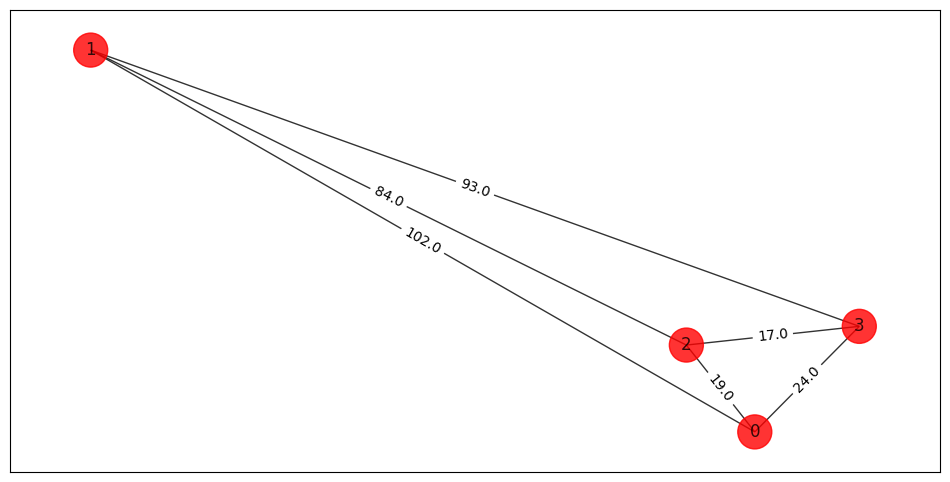

In [32]:
tsp = Tsp.create_random_instance(4, seed=43)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r"] * len(tsp.graph.nodes)
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

#### Converting the quadratic program to QUBO and Ising Hamiltonian

To solve this problem, we need to convert our quadratic program into a form that a quantum computer can work with. In this case we will generate an Ising Hamiltonian, which is simply a representation (i.e. model) of the energy of this particular system (i.e. problem). We can use eigensolvers to find the minimum energy of the Ising hamiltonian, which corresponds to the shortest path and the solution of our problem. 

How do we get the Ising Hamiltonian? First, we convert the quadratic program to a QUBO (Quadratic Unconstrained Binary Optimization), a combinatorial optimization problem representation to then obtain an Ising Hamiltonian. 

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Goal is to convert the quadratic program to Ising Hamiltonian. </b> 
    
Suggestions: tsp has a method called .to_quadratic_program(). The QuadraticProgramToQubo() class can instantiate a quadratic-to-qubo converter that, with its method .convert(), could lead to a qubo problem. A qubo has a .to_ising() method that returns both the qubit operator for the problem and offset for the constant value in the Ising Hamiltonian.

</div>

In [33]:
# >>> --- START EDITING --- <<<

#qp = ...
#qp2qubo =  ... # instatiate qp to qubo class
#qubo =  ... # convert quadratic program to qubo
#qubitOp, offset =  ... # convert qubo to ising

# >>> --- STOP EDITING --- <<<


qp = tsp.to_quadratic_program()
qp2qubo = QuadraticProgramToQubo()  # instatiate qp to qubo class
qubo = qp2qubo.convert(qp)  # convert quadratic program to qubo
qubitOp, offset = qubo.to_ising()  # convert qubo to ising

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Goal is to construct a VQE. </b> 
    
Now it's time for you to construct a VQE using the SamplingVQE in Qiskit! SamplingVQE is one of the two versions of VQE that Qiskit offers today and uses the sampler primitive optimized for diagonal Hamiltonians. The optimizer and ansatz are already given to you.

Suggestions:
- NFT is a good optimizer
- TwoLocal is a good ansatz

[SamplingVQE](https://docs.quantum.ibm.com/api/qiskit/0.39/qiskit.algorithms.minimum_eigensolvers.SamplingVQE)

</div>

energy: -40753.138671875
time: 2.6927402019500732
feasible: True
solution: [1, 2, 0, 3]
solution objective: 220.0


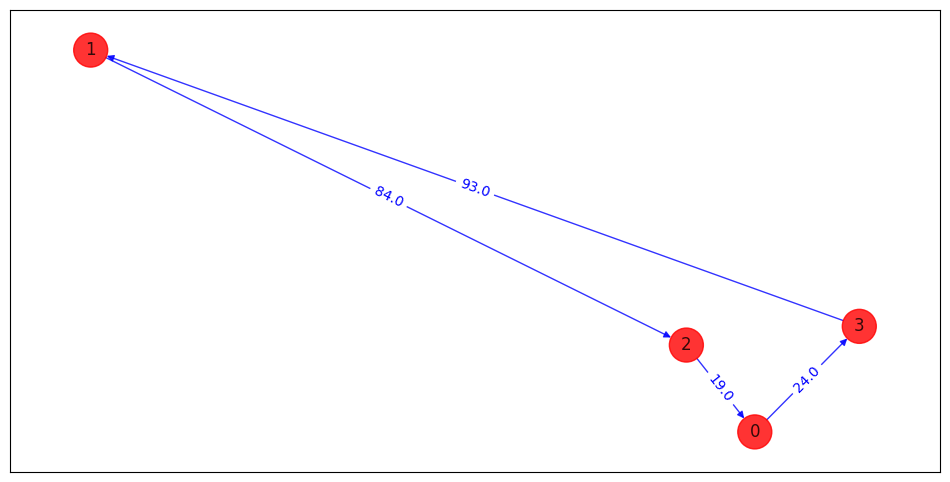

In [ ]:
# >>> --- START EDITING --- <<<

#optimizer = ...
#ansatz = ...
#sampler = ...
#vqe = ...
#result = ...

# >>> --- STOP EDITING --- <<<

optimizer = NFT(maxiter=100)
ansatz = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=2, entanglement="linear")
sampler = AerSampler()
vqe = SamplingVQE(sampler, ansatz, optimizer) 
result = vqe.compute_minimum_eigenvalue(qubitOp)

# Print the results
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

---

# Section 6: Advanced challenge

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Question: Exploring the dependence of quantum measurement on a spin on the qubit. </b> 
    
Write a programme that constructs a quantum circuit with a single qubit and a parametric rotation r(). Calculate the probability of measuring state 1 on the qubit as the angle θ changes, and display the trend of this probability via a graph.

Apply all the commands you have learnt in this notebook. Experiment with different backends, ideal or noisy, local or real, experiment with different levels of transpilation optimisation and error mitigation techniques.
</div>

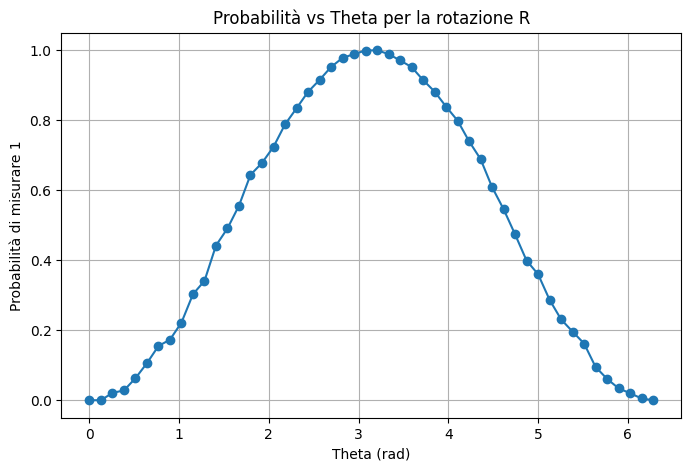

In [ ]:
shots = 1000
theta_vals = np.linspace(0, 2 * math.pi, 50)
probabilities = []

for theta in theta_vals:
    qc = QuantumCircuit(1, 1)
    qc.r(theta, 0, 0)
    qc.measure(0, 0)

    transpiled = transpile(qc, backend=aer_sim)
    result = sampler.run([transpiled], shots=shots).result()
    counts = result[0].data.c.get_counts()

    p1 = counts.get('1', 0) / shots
    probabilities.append(p1)

plt.figure(figsize=(8, 5))
plt.plot(theta_vals, probabilities, marker='o')
plt.xlabel("Theta (rad)")
plt.ylabel("Probabilità di misurare 1")
plt.title("Probabilità vs Theta per la rotazione R")
plt.grid(True)
plt.show()

<a id = "badge1_ex5"></a>

<div class="alert alert-block alert-info">
    
<b> Bonus question: Exploring the dependence of quantum measurement on a spin on the qubit. </b> 
    
What about the angle $\phi$? It explores the dependence of the probability on this angle, and modifies the previous code to show the probability surface as the two angles vary.
</div>

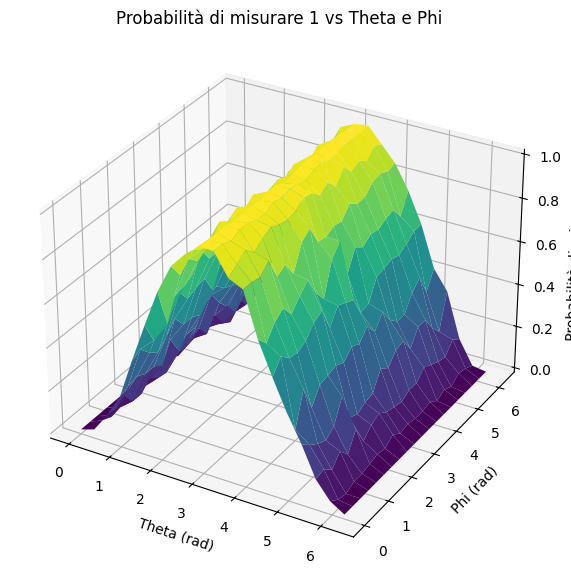

In [142]:
shots = 100

theta_vals = np.linspace(0, 2 * math.pi, 20)
phi_vals = np.linspace(0, 2 * math.pi, 20)
Theta, Phi = np.meshgrid(theta_vals, phi_vals)
Prob1 = np.zeros_like(Theta)

for i in range(len(theta_vals)):
    for j in range(len(phi_vals)):
        theta = Theta[j, i]
        phi = Phi[j, i]

        qc = QuantumCircuit(1, 1)
        qc.u(theta, phi, 0, 0) 
        qc.measure(0, 0)

        transpiled = transpile(qc, backend=aer_sim)
        result = sampler.run([transpiled], shots=shots).result()
        counts = result[0].data.c.get_counts()

        p1 = counts.get('1', 0) / shots
        Prob1[j, i] = p1

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta, Phi, Prob1, cmap='viridis')

ax.set_xlabel('Theta (rad)')
ax.set_ylabel('Phi (rad)')
ax.set_zlabel('Probabilità di misurare 1')
ax.set_title('Probabilità di misurare 1 vs Theta e Phi')

plt.show()


---